In [1]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image

/home/anton/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image3 = load_image("/home/anton/Pictures/Screenshots/ARM.png")
image4 = load_image("/home/anton/Pictures/Screenshots/ARM2.png")

In [3]:
import torch
torch.cuda.empty_cache()

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load images
image1 = load_image("https://cdn.britannica.com/61/93061-050-99147DCE/Statue-of-Liberty-Island-New-York-Bay.jpg")
image2 = load_image("https://huggingface.co/spaces/merve/chameleon-7b/resolve/main/bee.jpg")

# Initialize processor and model
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-256M-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-256M-Instruct",
    torch_dtype=torch.float16,
    _attn_implementation="eager", #"flash_attention_2" if DEVICE == "cuda" else 
    # device_map="auto",
    # low_cpu_mem_usage=True,
).to(DEVICE)

In [ ]:
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe this image? Do you see the robot arm gripper and where? Give relative coords"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image4], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])
# """
# Assistant: The first image shows a green statue of the Statue of Liberty standing on a stone pedestal in front of a body of water. 
# The statue is holding a torch in its right hand and a tablet in its left hand. The water is calm and there are no boats or other objects visible. 
# The sky is clear and there are no clouds. The second image shows a bee on a pink flower. 
# The bee is black and yellow and is collecting pollen from the flower. The flower is surrounded by green leaves.
# """

User:




Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: Yes, there is a robot arm gripper in the top right corner of the image.


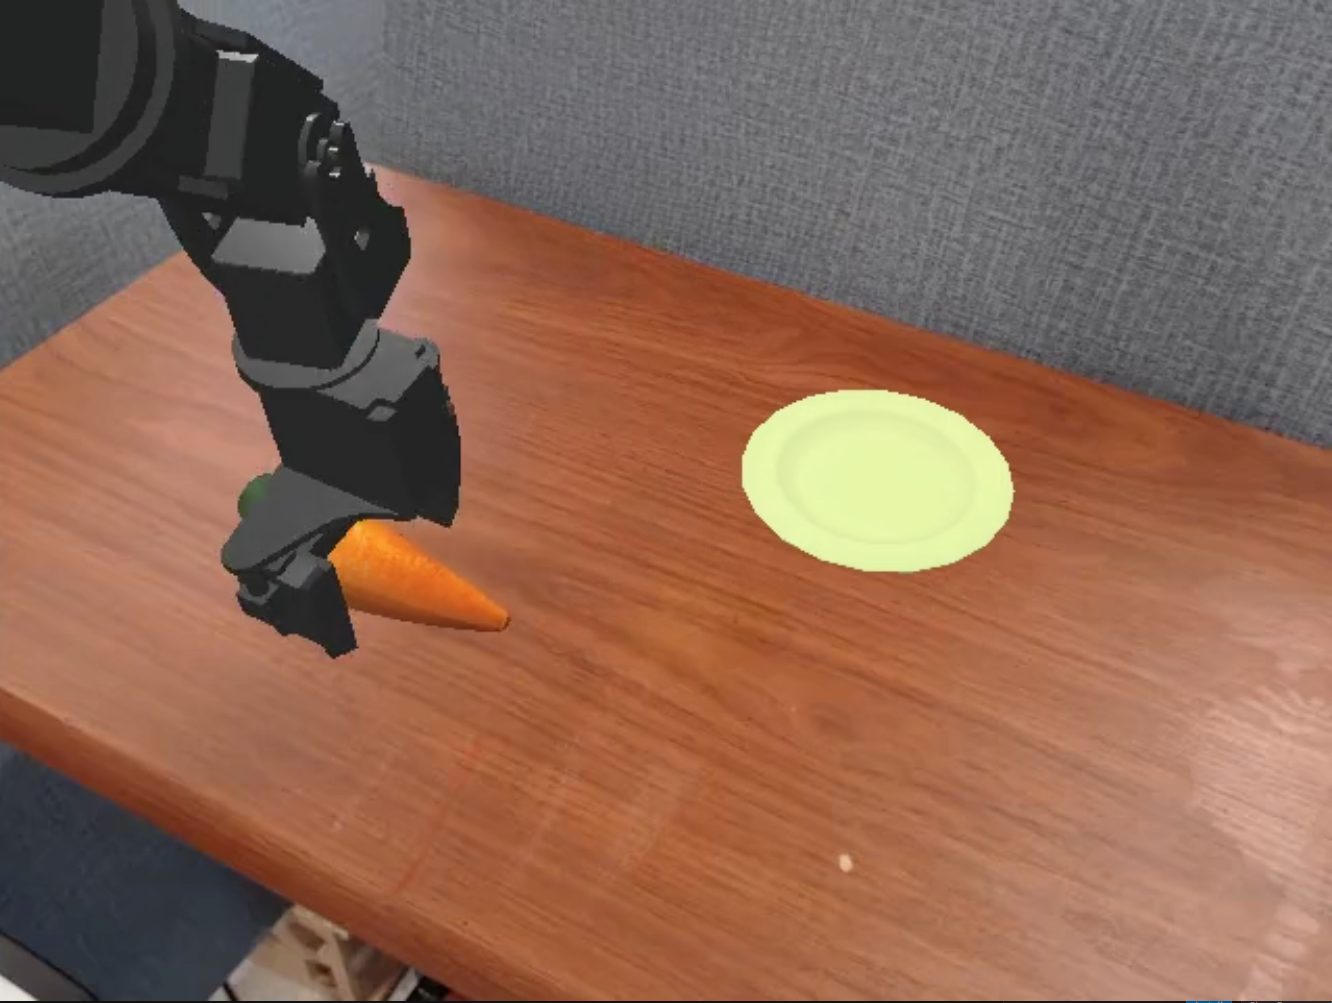

In [18]:
image4

In [5]:
import numpy as np

# Загрузка массива
data = np.load("./RL4VLA/SimplerEnv/octo_collect/PutCarrotOnPlateInScene-v1/7/data/data_0000.npy", allow_pickle=True).item()

print(data.keys())          
# print(data.shape)    
img = data["image"][0]    

# import matplotlib.pyplot as plt
# for item in data["image"]:
#     plt.imshow(item)
#     plt.axis("off")  
#     plt.show()



dict_keys(['image', 'instruction', 'action', 'info'])


In [ ]:
import numpy as np

Data = [np.load(f"./RL4VLA/ManiSkill/mp_collect/PutOnPlateInScene25Single-v1/75/data/success_proc_0_numid_{i}_epsid_{i}.npz", allow_pickle=True) for i in range(0, 75)] 

data = Data[0]["arr_0"].item()

print(data.keys())

import pandas as pd

info_df = pd.DataFrame( [ data["info"][i].values() for i in range(len(data["info"])) ] )
info_df.columns = data["info"][0].keys()
info_df["action"] = [item for item in data["action"]]
print(data["action"][12])

info_df

# print(data["info"])

dict_keys(['is_image_encode', 'image', 'instruction', 'action', 'info'])
[ 1.7428398e-04  5.6948513e-05 -1.5348103e-04  4.6895238e-05
  5.0190913e-05  2.2778186e-04  1.0000000e+00]


elapsed_steps is_src_obj_grasped consecutive_grasp src_on_target  \
0           [30]            [False]           [False]       [False]   
1           [30]            [False]           [False]       [False]   
2           [30]            [False]           [False]       [False]   
3           [30]            [False]           [False]       [False]   
4           [30]            [False]           [False]       [False]   
5           [30]            [False]           [False]       [False]   
6           [30]            [False]           [False]       [False]   
7           [30]            [False]           [False]       [False]   
8           [30]            [False]           [False]       [False]   
9           [30]            [False]           [False]       [False]   
10          [30]            [False]           [False]       [False]   
11          [30]            [False]           [False]       [False]   
12          [30]            [False]           [False]       [False]   
13          [30]            [False]           [False]       [False]   
14          [30]             [True]           [False]       [False]   
15          [30]             [True]            [True]       [False]   
16          [30]             [True]            [True]       [False]   
17          [30]             [True]            [True]       [False]   
18          [30]             [True]            [True]       [False]   
19          [30]             [True]            [True]       [False]   
20          [30]             [True]            [True]       [False]   
21          [30]             [True]            [True]       [False]   
22          [30]             [True]            [True]       [False]   
23          [30]             [True]            [True]       [False]   
24          [30]             [True]            [True]       [False]   
25          [30]             [True]            [True]       [False]   
26          [30]             [True]            [True]       [False]   
27          [30]             [True]            [True]       [False]   
28          [30]             [True]            [True]       [False]   
29          [30]             [True]            [True]        [True]   

   gripper_carrot_dist gripper_plate_dist carrot_plate_dist  success  \
0         [0.16375038]        [0.1963564]      [0.08682613]  [False]   
1         [0.16340235]       [0.19635652]      [0.08692508]  [False]   
2         [0.16151221]       [0.19491147]     [0.086874016]  [False]   
3         [0.15397389]       [0.18985167]     [0.086892925]  [False]   
4         [0.14012681]       [0.18011159]     [0.086896464]  [False]   
5        [0.120365605]       [0.16591677]     [0.086896464]  [False]   
6         [0.10149175]       [0.15164658]     [0.086896464]  [False]   
7         [0.08753325]       [0.14017165]     [0.086862884]  [False]   
8         [0.07940232]       [0.13288261]     [0.086880036]  [False]   
9        [0.079286225]       [0.13275407]      [0.08688335]  [False]   
10       [0.073875874]       [0.12851796]      [0.08688654]  [False]   
11        [0.05564123]       [0.11522006]      [0.08688942]  [False]   
12       [0.037616648]       [0.10298055]      [0.08689311]  [False]   
13        [0.03010424]       [0.09801651]      [0.08850507]  [False]   
14       [0.027685527]       [0.11053001]     [0.102648616]  [False]   
15        [0.02769254]       [0.11035867]      [0.10257085]  [False]   
16       [0.027693188]       [0.11134568]      [0.10257192]  [False]   
17        [0.02769311]      [0.117461964]      [0.10546066]  [False]   
18       [0.027693216]        [0.1321699]      [0.11561235]  [False]   
19       [0.027693128]       [0.15004013]      [0.13037683]  [False]   
20       [0.027693128]        [0.1633622]      [0.14222729]  [False]   
21       [0.027693009]       [0.16882852]      [0.14728065]  [False]   
22       [0.027693214]       [0.16858347]      [0.14712253]  [False]   
23       [0.027692972]       [0.16503748]      [0.14358139]  [False]   
2

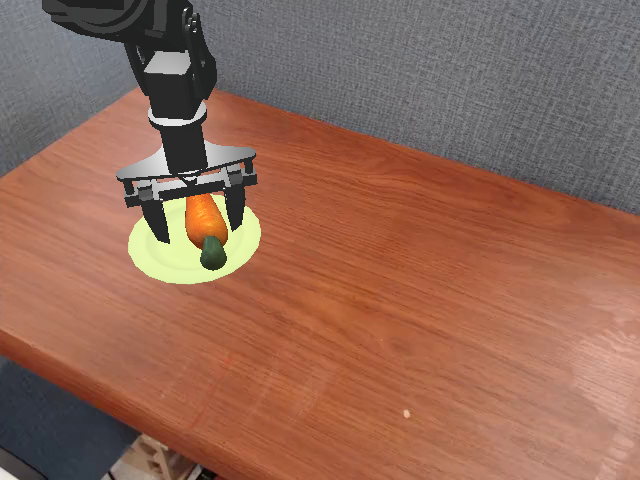

In [88]:
images_for_shadowing = data["image"]
images_for_shadowing[-1]

In [20]:
images_last_action = [Data[i]["arr_0"].item()["image"][-1] for i in range(len(Data))]

len(images_last_action)


75

In [29]:
images_last_action

[<PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=64

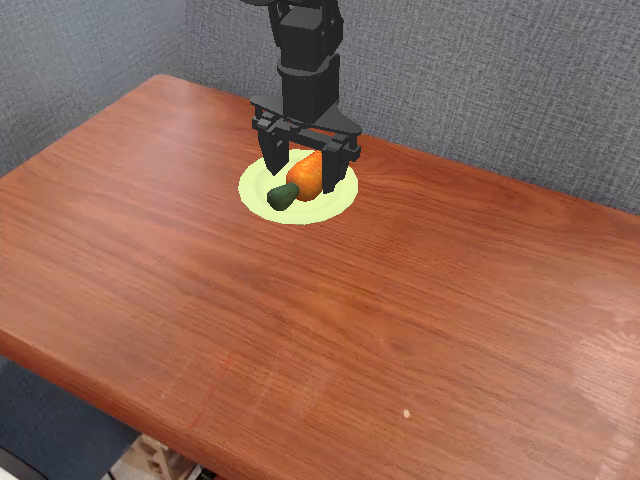

In [23]:
images_last_action[-1]

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe this image? Do you see the robot arm gripper and where? Give relative coords"}
        ]
    },
]

answers = []

for image in data["image"]:
    # Prepare inputs
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = inputs.to(DEVICE)

    # Generate outputs
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_texts = processor.batch_decode(
        generated_ids,
        skip_special_tokens=True,
    )
    answers.append(generated_texts[0])


In [9]:
for item in answers:
    print(item)

User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: No, there is no robot or robot arm present in the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: No, there is no robot or robot arm present in the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: No, there is no robot or robot arm gripper present in the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: Yes, there is a robot arm gripper in the top right corner of the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: Yes, there is a robot arm gripper in the top right corner of the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assi

In [10]:
len(answers)

33

In [24]:
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Is the orange object (carrot) on the yellow plate in this image? Yes/No."}
        ]
    },
]

benchmark_answ = []

for image in images_last_action:
    # Prepare inputs
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = inputs.to(DEVICE)

    # Generate outputs
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_texts = processor.batch_decode(
        generated_ids,
        skip_special_tokens=True,
    )
    benchmark_answ.append(generated_texts[0])

In [ ]:
for answ in benchmark_answ:
    print(answ)

sum("Assistant: Yes" in s for s in benchmark_answ)/len()

User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: Yes.
User:



Is the orange object (carrot) on the yellow plate in this image? Yes/No.
Assistant: No.
User:



Is the orang

58

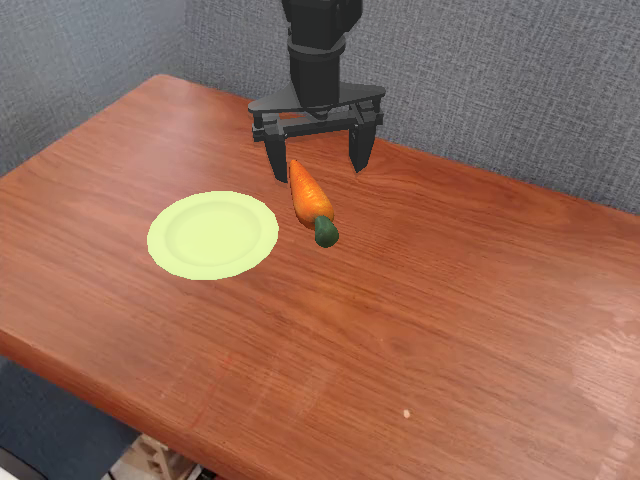

In [47]:
from PIL import Image

# Load images and convert to RGBA
img1 = images_for_shadowing[10].convert("RGBA")
img2 = images_for_shadowing[9].convert("RGBA")
img3 = images_for_shadowing[8].convert("RGBA")

# Blend gradually
blend1 = Image.blend(img1, img2, alpha=0.7)  # second image faint
final = Image.blend(blend1, img3, alpha=0.5) # third image even fainter

final


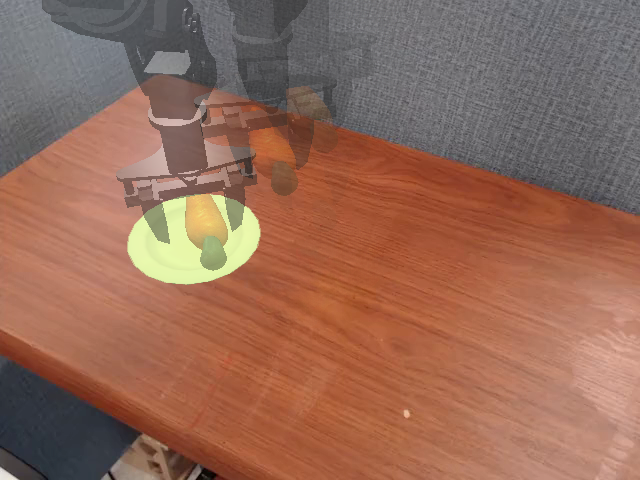

In [86]:
from PIL import Image
import numpy as np

def create_trail(frames, alphas=None):
    """
    Create a motion trail effect by blending multiple PIL RGB frames.
    
    frames: list of PIL.Image.Image objects (all same size, RGB).
    alphas: list of weights (same length as frames) — if None, use fading weights.
    
    Returns: PIL.Image.Image with trail effect.
    """
    n = len(frames)
    if alphas is None:
        # Decreasing weights (strongest for most recent frame)
        alphas = np.linspace(0.8, 0.1, n)  
    alphas = np.array(alphas) / np.sum(alphas)  # normalize
    
    # Convert frames to numpy arrays
    arrays = [np.asarray(f).astype(np.float32) for f in frames]
    
    # Weighted sum
    result = np.zeros_like(arrays[0])
    for arr, w in zip(arrays, alphas):
        result += arr * w
    
    result = np.clip(result, 0, 255).astype(np.uint8)
    return Image.fromarray(result)

ifs = images_for_shadowing[::-4]
trail_img = create_trail(ifs[0:4])
trail_img


In [90]:
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe the carrot path?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[images_for_shadowing[0], images_for_shadowing[-1]], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])

User:







Can you describe the carrot path?
Assistant: The carrot is on the carrot path.


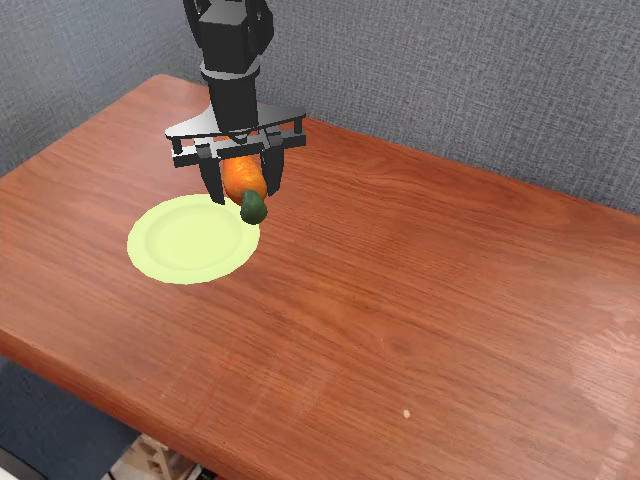

In [95]:
images_for_shadowing[-4]

In [ ]:
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe the carrot path?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[images_for_shadowing[0], images_for_shadowing[-1]], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])